**Preprocessing and Visualisation**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/Feedback.csv')

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   id  customer_id  store_id  order_id  \
0   1            1         1         1   
1   2            2         1         2   
2   3            3         1         3   
3   4            4         1         4   
4   5            5         1         5   

                                              review  rating  
0  Why does it look like someone spit on my food?...       1  
1  It'd McDonalds. It is what it is as far as the...       4  
2  Made a mobile order got to the speaker and che...       1  
3  My mc. Crispy chicken sandwich was ???????????...       5  
4  I repeat my order 3 times in the drive thru an...       1  


In [4]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           32053 non-null  int64 
 1   customer_id  32053 non-null  int64 
 2   store_id     32053 non-null  int64 
 3   order_id     32053 non-null  int64 
 4   review       32053 non-null  object
 5   rating       32053 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ MB


In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id             0
customer_id    0
store_id       0
order_id       0
review         0
rating         0
dtype: int64


In [6]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [7]:
print("\nStatistical summary after cleaning:")
print(df.describe())


Statistical summary after cleaning:
                 id   customer_id      store_id      order_id        rating
count  32053.000000  32053.000000  32053.000000  32053.000000  32053.000000
mean   16027.000000  16027.000000     22.255109  16027.000000      3.116307
std     9253.048426   9253.048426     11.304959   9253.048426      1.619645
min        1.000000      1.000000      1.000000      1.000000      1.000000
25%     8014.000000   8014.000000     13.000000   8014.000000      1.000000
50%    16027.000000  16027.000000     26.000000  16027.000000      3.000000
75%    24040.000000  24040.000000     32.000000  24040.000000      5.000000
max    32053.000000  32053.000000     37.000000  32053.000000      5.000000


In [8]:
df.columns

Index(['id', 'customer_id', 'store_id', 'order_id', 'review', 'rating'], dtype='object')

In [9]:
def label_sentiment(rating):
  if rating >= 4:
    return 'Positive'
  elif rating <= 2:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment'] = df['rating'].apply(label_sentiment)
print(df.head())

   id  customer_id  store_id  order_id  \
0   1            1         1         1   
1   2            2         1         2   
2   3            3         1         3   
3   4            4         1         4   
4   5            5         1         5   

                                              review  rating Sentiment  
0  Why does it look like someone spit on my food?...       1  Negative  
1  It'd McDonalds. It is what it is as far as the...       4  Positive  
2  Made a mobile order got to the speaker and che...       1  Negative  
3  My mc. Crispy chicken sandwich was ???????????...       5  Positive  
4  I repeat my order 3 times in the drive thru an...       1  Negative  


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])
df.head()

,id,customer_id,store_id,order_id,review,rating,Sentiment
0,1,1,1,1,Why does it look like someone spit on my food?...,1,0
1,2,2,1,2,It'd McDonalds. It is what it is as far as the...,4,2
2,3,3,1,3,Made a mobile order got to the speaker and che...,1,0
3,4,4,1,4,My mc. Crispy chicken sandwich was ???????????...,5,2
4,5,5,1,5,I repeat my order 3 times in the drive thru an...,1,0


In [11]:
df['Sentiment'].value_counts()

,count
Sentiment,
2,15295
0,12174
1,4584


In [12]:
negative_feedback = df[df['Sentiment'] == 0]['review']
neutral_feedback = df[df['Sentiment'] == 1]['review']
positive_feedback = df[df['Sentiment'] == 2]['review']

In [13]:
negative_feedback_wc = WordCloud().generate(negative_feedback.to_string())
neutral_feedback_wc = WordCloud().generate(neutral_feedback.to_string())
positive_feedback_wc = WordCloud().generate(positive_feedback.to_string())

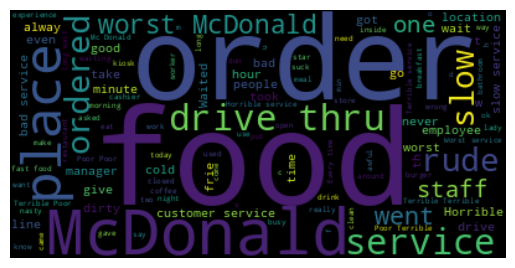

In [14]:
plt.imshow(negative_feedback_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

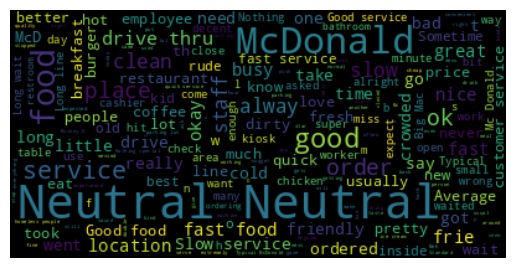

In [15]:
plt.imshow(neutral_feedback_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

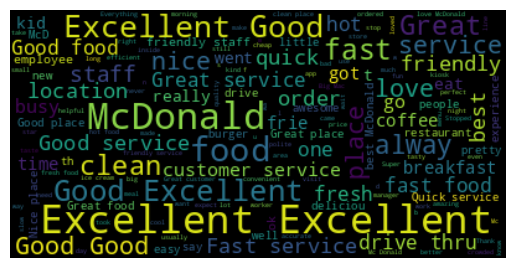

In [16]:
plt.imshow(positive_feedback_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
import string
punc = string.punctuation

import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

In [18]:
def data_cleaning(text):
  doc = nlp(text)

  tokens = []
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punc:
      cleaned_tokens.append(token)

  return " ".join(cleaned_tokens)

df['review'] = df['review'].apply(data_cleaning)
df.head()

,id,customer_id,store_id,order_id,review,rating,Sentiment
0,1,1,1,1,look like spit food normal transaction chill p...,1,0
1,2,2,1,2,mcdonalds far food atmosphere staff difference...,4,2
2,3,3,1,3,mobile order speaker check line leave i???????...,1,0
3,4,4,1,4,mc crispy chicken sandwich customer service qu...,5,2
4,5,5,1,5,repeat order 3 time drive manage mess suppose ...,1,0


In [ ]:
pip install mlflow

**Model**

In [28]:
import mlflow
import mlflow.sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [22]:
x = df['review']
y = df['Sentiment']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape, x_test.shape

((25642,), (6411,))

In [25]:
tfidf = TfidfVectorizer()

In [29]:
random_forest = RandomForestClassifier()
linear_svc = LinearSVC()

pipeline_svc = Pipeline([
    ('tfidf', tfidf),
    ('clf', linear_svc)
])

pipeline_rf = Pipeline([
    ('tfidf', tfidf),
    ('clf', random_forest)
])

In [31]:
for model_name, pipeline in [('LinearSVC', pipeline_svc), ('RandomForest', pipeline_rf)]:
    with mlflow.start_run():
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("tfidf_max_features", tfidf.max_features)

        pipeline.fit(x_train, y_train)

        y_pred = pipeline.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)

        mlflow.sklearn.log_model(pipeline, f"{model_name}_model")
        print(f"Logged {model_name} model and metrics to MLflow with accuracy: {accuracy}")

2024/10/23 16:42:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LinearSVC model and metrics to MLflow with accuracy: 0.8153174231789112


2024/10/23 16:43:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RandomForest model and metrics to MLflow with accuracy: 0.831695523319295


**Performance metrics**

In [32]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 83.17%


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2469
           1       0.79      0.41      0.54       916
           2       0.84      0.91      0.87      3026

    accuracy                           0.83      6411
   macro avg       0.82      0.74      0.76      6411
weighted avg       0.83      0.83      0.82      6411



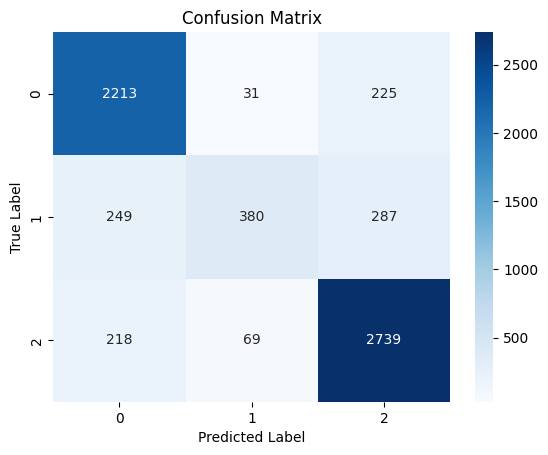

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()